In [153]:
# Imports
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [154]:
# MEME on p53 empirical alignment
#path = "../MEME"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "p53_Treemmer_MEME_AllBranches_PositiveSites.png"

# MEME on p53 empirical alignment - Internal branches only
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME_internal.json")]
#output_header = "p53_Treemmer_MEME_InternalBranches_PositiveSites.png"    

# MEME - KeepAligned    
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "p53_Treemmer_KeepAligned_MEME_AllBranches_PositiveSites.png" 

# MEME Internal - KeepAligned    
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME_internal.json")]
#output_header = "p53_Treemmer_KeepAligned_MEME_InternalBranches_PositiveSites.png" 

# Sims - Uniform
# MEME
#path = "../../Sims/subsampled_fasta/o01"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_Uniform_omega01_Treemmer_MEME_AllBranches_PositiveSites.png" 

#path = "../../Sims/subsampled_fasta/o1"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_Uniform_omega1_Treemmer_MEME_AllBranches_PositiveSites.png" 

#path = "../../Sims/subsampled_fasta/o10"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_Uniform_omega10_Treemmer_MEME_AllBranches_PositiveSites.png" 

## Sims - GammaDistributed
# Gamma distributed sims
#path = "../../Sims/GammaDistributed/subsampled_fasta/o01"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_GammaDistributed_omega01_Treemmer_MEME_AllBranches_PositiveSites.png" 

#path = "../../Sims/GammaDistributed/subsampled_fasta/o1"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_GammaDistributed_omega1_Treemmer_MEME_AllBranches_PositiveSites.png" 

#path = "../../Sims/GammaDistributed/subsampled_fasta/o10"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "Sims_GammaDistributed_omega10_Treemmer_MEME_AllBranches_PositiveSites.png" 

# MEME on Subsampling_with_TN93-Algo
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "../../Plots/BDNF_TN93Algo_MEME_AllBranches.png"

# MEME on Subsampling_with_TN93-Algo
path = "../../Test_TN93_algo_subsamples"
files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME_internal.json")]
output_header = "../../Plots/BDNF_TN93Algo_MEME_InternalBranches.png"


files

['../../Test_TN93_algo_subsamples/Test.aln_subsampled_220.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_217.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_50.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_67.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_118.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_176.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_141.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_89.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_63.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_54.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_213.fasta.MEME_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_224.fasta.MEME_i

In [155]:
data_dict = {}
pvalue_threshold = 0.1

def return_positive_sites_count(MLE):
    global pvalue_threshold
    
    data_list = []
    count = 0
    
    for n, item in enumerate(MLE):
        if float(item[6] < pvalue_threshold): 
            count += 1
            site = n + 1
            data_list.append(site) 
            
        #end if
    #end for
    return count, data_list
#end method

# Main -------------------------------------------------
count = 1

for filename in files:
    
    if os.stat(filename).st_size == 0: continue
    
    with open(filename, "r") as fh:
        try:
            json_data = json.load(fh)
        except:
            continue
        #end try
    #end with
    
    num_seqs = json_data["input"]["number of sequences"]
    num_sites = json_data["input"]["number of sites"]
    
    # Here
    print(filename.split("/")[-1], num_seqs, num_sites)
    
    positive_sites, positive_sites_list = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    
    
    # p-values
    p_values_list = []
    
    for item in json_data["MLE"]["content"]["0"]:
        p_value = item[6] # Updated for MEME format.
        p_values_list.append(p_value)
    #end for
    
    """
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list}
    """
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "p_values":p_values_list}
    
    
    count += 1
#end for

Test.aln_subsampled_220.fasta.MEME_internal.json 99 634
Test.aln_subsampled_217.fasta.MEME_internal.json 102 634
Test.aln_subsampled_50.fasta.MEME_internal.json 269 634
Test.aln_subsampled_67.fasta.MEME_internal.json 252 634
Test.aln_subsampled_118.fasta.MEME_internal.json 201 634
Test.aln_subsampled_176.fasta.MEME_internal.json 143 634
Test.aln_subsampled_141.fasta.MEME_internal.json 178 634
Test.aln_subsampled_89.fasta.MEME_internal.json 230 634
Test.aln_subsampled_63.fasta.MEME_internal.json 256 634
Test.aln_subsampled_54.fasta.MEME_internal.json 265 634
Test.aln_subsampled_213.fasta.MEME_internal.json 106 634
Test.aln_subsampled_224.fasta.MEME_internal.json 95 634
Test.aln_subsampled_198.fasta.MEME_internal.json 121 634
Test.aln_subsampled_145.fasta.MEME_internal.json 174 634
Test.aln_subsampled_172.fasta.MEME_internal.json 147 634
Test.aln_subsampled_58.fasta.MEME_internal.json 261 634
Test.aln_subsampled_36.fasta.MEME_internal.json 283 634
Test.aln_subsampled_228.fasta.MEME_inter

Test.aln_subsampled_45.fasta.MEME_internal.json 274 634
Test.aln_subsampled_72.fasta.MEME_internal.json 247 634
Test.aln_subsampled_98.fasta.MEME_internal.json 221 634
Test.aln_subsampled_86.fasta.MEME_internal.json 233 634
Test.aln_subsampled_35.fasta.MEME_internal.json 284 634
Test.aln_subsampled_197.fasta.MEME_internal.json 122 634
Test.aln_subsampled_124.fasta.MEME_internal.json 195 634
Test.aln_subsampled_113.fasta.MEME_internal.json 206 634
Test.aln_subsampled_82.fasta.MEME_internal.json 237 634
Test.aln_subsampled_31.fasta.MEME_internal.json 288 634
Test.aln_subsampled_218.fasta.MEME_internal.json 101 634
Test.aln_subsampled_68.fasta.MEME_internal.json 251 634
Test.aln_subsampled_193.fasta.MEME_internal.json 126 634
Test.aln_subsampled_117.fasta.MEME_internal.json 202 634
Test.aln_subsampled_120.fasta.MEME_internal.json 199 634
Test.aln_subsampled_179.fasta.MEME_internal.json 140 634
Test.aln_subsampled_223.fasta.MEME_internal.json 96 634
Test.aln_subsampled_214.fasta.MEME_inter

In [156]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

,Filename,num_seqs,num_sites,positive_sites,positive_sites_list,p_values
1,Test.aln_subsampled_220.fasta.MEME_internal.json,99,634,22,"[100, 101, 104, 106, 107, 118, 119, 127, 130, ...","[1, 1, 1, 1, 0.6666666666666666, 0.66666666666..."
2,Test.aln_subsampled_217.fasta.MEME_internal.json,102,634,20,"[59, 83, 100, 101, 104, 106, 107, 118, 122, 13...","[1, 1, 0.2601476056437161, 0.2304291645397501,..."
3,Test.aln_subsampled_50.fasta.MEME_internal.json,269,634,43,"[7, 8, 11, 59, 62, 83, 100, 103, 105, 106, 107...","[1, 1, 0.2021184175684807, 0.2538000793723628,..."
4,Test.aln_subsampled_67.fasta.MEME_internal.json,252,634,39,"[7, 8, 11, 59, 83, 100, 105, 106, 107, 119, 12...","[1, 1, 0.202293569523297, 0.1492010034397588, ..."
5,Test.aln_subsampled_118.fasta.MEME_internal.json,201,634,39,"[7, 8, 11, 59, 62, 83, 100, 105, 106, 119, 121...","[1, 1, 0.1687945501143405, 0.2055642304706915,..."
...,...,...,...,...,...,...
234,Test.aln_subsampled_230.fasta.MEME_internal.json,89,634,22,"[100, 101, 104, 106, 107, 118, 119, 127, 130, ...","[1, 1, 1, 1, 0.6666666666666666, 0.66666666666..."
235,Test.aln_subsampled_5.fasta.MEME_internal.json,314,634,37,"[8, 59, 62, 100, 106, 119, 122, 128, 129, 130,...","[1, 0.6666666666666666, 0.4365222046718585, 0...."
236,Test.aln_subsampled_151.fasta.MEME_internal.json,168,634,36,"[7, 8, 11, 59, 62, 83, 100, 101, 105, 106, 122...","[1, 1, 0.1583016093286443, 0.1880143209531083,..."
237,Test.aln_subsampled_166.fasta.MEME_internal.json,153,634,29,"[11, 59, 62, 83, 86, 87, 100, 101, 104, 106, 1...","[1, 1, 0.1447552250280529, 0.189829260613553, ..."


In [157]:
df.sort_values(by=['num_seqs'], ascending=False, inplace=True)
df

,Filename,num_seqs,num_sites,positive_sites,positive_sites_list,p_values
222,Test.aln_subsampled_1.fasta.MEME_internal.json,318,634,40,"[8, 59, 62, 100, 106, 119, 122, 128, 129, 130,...","[1, 0.6666666666666666, 0.4316178825670992, 0...."
60,Test.aln_subsampled_2.fasta.MEME_internal.json,317,634,37,"[8, 59, 62, 100, 106, 119, 122, 128, 129, 130,...","[1, 0.6666666666666666, 0.4334350015496429, 0...."
39,Test.aln_subsampled_3.fasta.MEME_internal.json,316,634,38,"[8, 59, 100, 106, 119, 122, 128, 129, 130, 139...","[1, 0.6666666666666666, 0.4336689890992272, 0...."
142,Test.aln_subsampled_4.fasta.MEME_internal.json,315,634,39,"[8, 59, 100, 106, 119, 122, 128, 129, 130, 139...","[1, 0.6666666666666666, 0.4365268290921456, 0...."
235,Test.aln_subsampled_5.fasta.MEME_internal.json,314,634,37,"[8, 59, 62, 100, 106, 119, 122, 128, 129, 130,...","[1, 0.6666666666666666, 0.4365222046718585, 0...."
...,...,...,...,...,...,...
223,Test.aln_subsampled_234.fasta.MEME_internal.json,85,634,20,"[100, 101, 104, 106, 107, 118, 119, 127, 130, ...","[1, 1, 1, 1, 0.6666666666666666, 0.66666666666..."
146,Test.aln_subsampled_235.fasta.MEME_internal.json,84,634,20,"[100, 101, 104, 106, 107, 118, 119, 127, 130, ...","[1, 1, 1, 1, 0.6666666666666666, 0.66666666666..."
40,Test.aln_subsampled_236.fasta.MEME_internal.json,83,634,19,"[100, 101, 104, 106, 107, 118, 127, 130, 131, ...","[1, 1, 1, 1, 0.6666666666666666, 0.66666666666..."
61,Test.aln_subsampled_237.fasta.MEME_internal.json,82,634,21,"[100, 101, 104, 106, 107, 118, 127, 130, 131, ...","[1, 1, 1, 1, 0.6666666666666666, 0.66666666666..."


In [158]:
def plot_df(df, y):
    global output_header
    plt.figure()
    df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", lw=4, y=y, x="num_seqs", markerfacecolor='black', marker='o', markersize=6, rot=90, figsize=(12,12))
    plt.xticks(fontsize=20 )
    plt.yticks(fontsize=20 )
    plt.xlabel('Number of Sequences',  fontsize=24)
    plt.ylabel('Number of Sites', fontsize=24)
    plt.savefig(output_header)
    plt.show()
#end method


<Figure size 432x288 with 0 Axes>

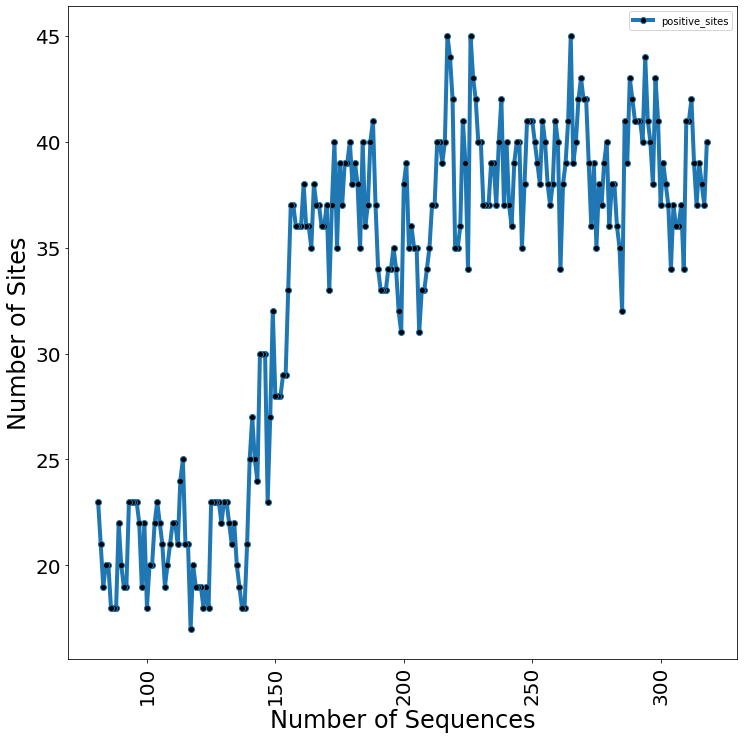

In [159]:
plot_df(df, "positive_sites")